# Question 1: Application of Diﬀerentiation in AI Model Optimization

In [45]:
from cProfile import label

import sympy as sp
from IPython.display import display

x, y = sp.symbols('x y')
loss_function = sp.exp(x**2 + y**2) + sp.cos(x * y)

L = sp.Function('L')

loss_function_equation = sp.Eq(L(x,y), loss_function)

print('Loss function is give by :')
display(loss_function_equation)

Loss function is give by :


Eq(L(x, y), exp(x**2 + y**2) + cos(x*y))

In [46]:
# (a) Find the partial derivatives

partial_derivative_x = sp.diff(loss_function, x)
partial_derivative_y = sp.diff(loss_function, y)

partial_derivative_eq_x = sp.Eq(sp.Symbol('\u2202L/\u2202x'), partial_derivative_x)
partial_derivative_eq_y = sp.Eq(sp.Symbol('\u2202L/\u2202y'), partial_derivative_y)

display(partial_derivative_eq_x)
display(partial_derivative_eq_y)

Eq(∂L/∂x, 2*x*exp(x**2 + y**2) - y*sin(x*y))

Eq(∂L/∂y, -x*sin(x*y) + 2*y*exp(x**2 + y**2))

In [47]:
# (b) Write a Python function that computes the gradient vector for a given input (x,y).

def compute_gradient(x_value, y_value):
    gradient_x = partial_derivative_x.evalf(subs={x:x_value, y:y_value})
    gradient_y = partial_derivative_y.evalf(subs={x:x_value, y:y_value})
    return gradient_x, gradient_y

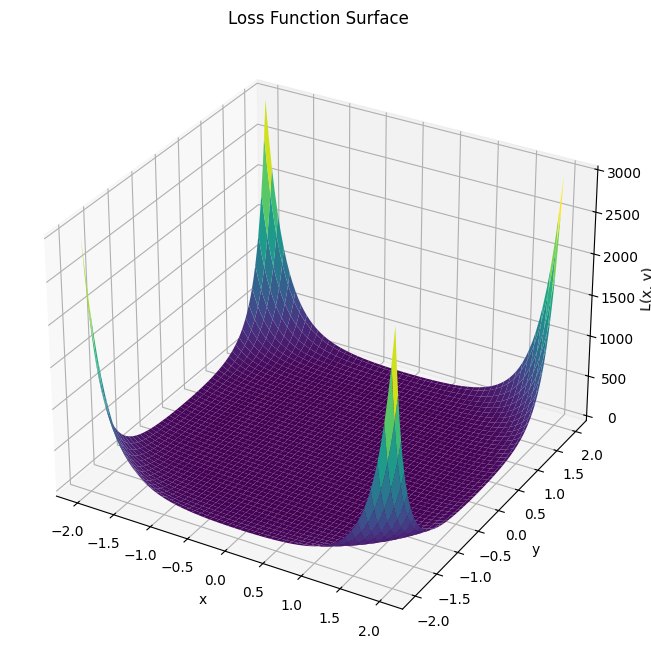

In [48]:
# (c) Use Matplotlib to visualize the loss function as a 3D surface plot over the range x,y ∈ [−2,2].

import numpy as np
import matplotlib.pyplot as plt

# defining the loss function as a numerical function for plotting
def loss_function_numeric(x,y):
    return np.exp(x**2 + y**2) + np.cos(x * y)

x_values = np.linspace(-2, 2, 100) # generating x values for the grid
y_values = np.linspace(-2, 2, 100) # generating y values for the grid
x_grid, y_grid = np.meshgrid(x_values, y_values) # generating a grid of those x and y values

# calculating the loss function values on the grid
z_values = loss_function_numeric(x_grid, y_grid)

# plotting the 3D surface
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
ax.plot_surface(x_grid, y_grid, z_values, cmap='viridis', edgecolor='none')
ax.set_title('Loss Function Surface')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('L(x, y)')

plt.show()

In [49]:
# (d) Discuss the significance of gradient vectors in model optimization, particularly in gradient descent methods.
discussion = 'Gradient vectors are essential for model optimization as they determine the direction and magnitude of parameter updates in methods like gradient descent. Their significance lies in efficiently guiding models to minimize errors and achieve better performance, making them foundational to many machine learning and deep learning algorithms.'

display(discussion)

'Gradient vectors are essential for model optimization as they determine the direction and magnitude of parameter updates in methods like gradient descent. Their significance lies in efficiently guiding models to minimize errors and achieve better performance, making them foundational to many machine learning and deep learning algorithms.'

# Question 2: Integration for Signal Processing

In [53]:
import sympy as sp
from IPython.display import display

t = sp.Symbol('t')
amplitude_of_signal_function = 2*t**(2)*sp.exp(-t)

A = sp.Function('A')
amplitude_of_signal_function_eq = sp.Eq(A(t), amplitude_of_signal_function)

print('The amplitude of a signal A(t) can be modeled by the function : ')
display(amplitude_of_signal_function_eq)

The amplitude of a signal A(t) can be modeled by the function : 


Eq(A(t), 2*t**2*exp(-t))

In [54]:
# (a) Use the Python library SymPy to compute the definite integral ∫₀⁴ 2t²e⁻ᵗ dt

integral_value = sp.integrate(amplitude_of_signal_function, (t, 0, 4))
display(integral_value)

4 - 52*exp(-4)

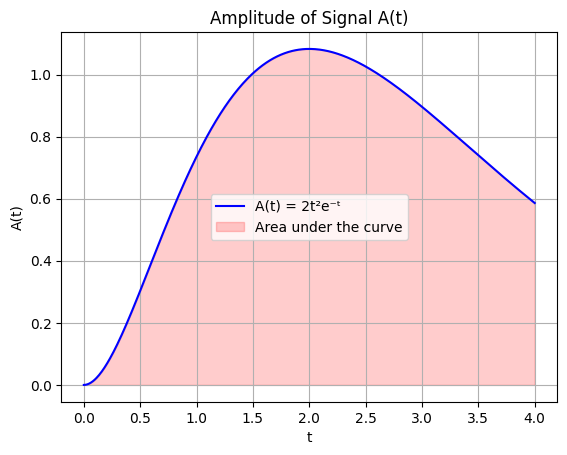

In [58]:
# (b) Plot the function A(t) using Matplotlib and annotate the graph with the area under the curve corresponding to the integral.

def amplitude_of_signal_function_numeric(t):
    return 2 * t**2 * np.exp(-t)

t_values = np.linspace(0, 4, 500)
Amplitude_values = amplitude_of_signal_function_numeric(t_values)

plt.plot(t_values, Amplitude_values, label='A(t) = 2t²e⁻ᵗ', color='blue')
plt.fill_between(t_values, Amplitude_values, alpha=0.2, label="Area under the curve", color='red')

plt.title("Amplitude of Signal A(t)")
plt.xlabel("t")
plt.ylabel("A(t)")
plt.legend()
plt.grid()

plt.show()

In [59]:
# (c) Interpret the meaning of the computed integral in the context of signal energy

interpretation = "The computed integral ∫₀⁴ 2t²e⁻ᵗ dt represents the total signal energy over the interval [0, 4].This quantifies the cumulative strength or power of the signal within this time frame."

display(interpretation)

'The computed integral ∫₀⁴ 2t²e⁻ᵗ dt represents the total signal energy over the interval [0, 4].This quantifies the cumulative strength or power of the signal within this time frame.'

# Question 3: Series Convergence and Numerical Approximation

In [89]:
x = sp.Symbol('x')
series_equation = sp.series(sp.ln(1 + x), x , 0, 5)

f = sp.Function('f')
series_eq = sp.Eq(f(x), series_equation)

print("The function f(x) = ln(1 + x) can be approximated by the series:")
display(series_eq)

The function f(x) = ln(1 + x) can be approximated by the series:


Eq(f(x), x - x**2/2 + x**3/3 - x**4/4 + O(x**5))

In [101]:
# (a) Implement a Python script that uses the first 10 terms of this series to approximate ln(1 + x) for x ∈ [−1,1]

def series_ln1x(x, n_terms=10):
    return sum(((-1)**(n + 1)) * (x**n) / n for n in range(1, n_terms + 1))

# Generate x values and compute approximations
x_values = np.linspace(-1, 1, 500)
ln_approximate_values = [series_ln1x(x) for x in x_values]

# Actual ln(1 + x) values for comparison
ln_actual_values = np.log(1 + x_values)

/var/folders/h2/cq81m0h16gj2mb69427tblgw0000gn/T/ipykernel_90207/4280405488.py:11: RuntimeWarning: divide by zero encountered in log
  ln_actual_values = np.log(1 + x_values)


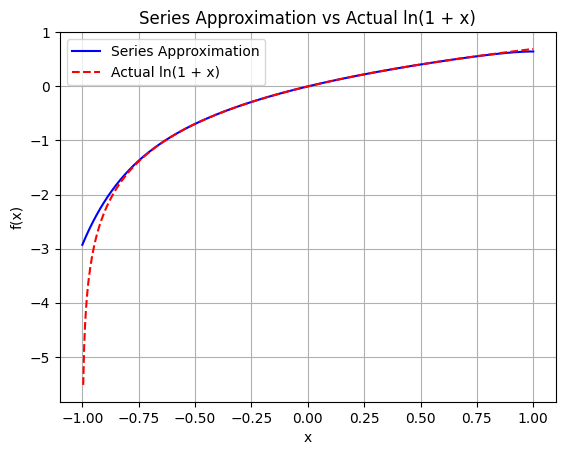

In [102]:
# Question 3(b): Plot the approximation and actual ln(1 + x) on the same graph

plt.plot(x_values, ln_approximate_values, label='Series Approximation', color='blue')
plt.plot(x_values, ln_actual_values, label='Actual ln(1 + x)', color='red', linestyle='dashed')
plt.title("Series Approximation vs Actual ln(1 + x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

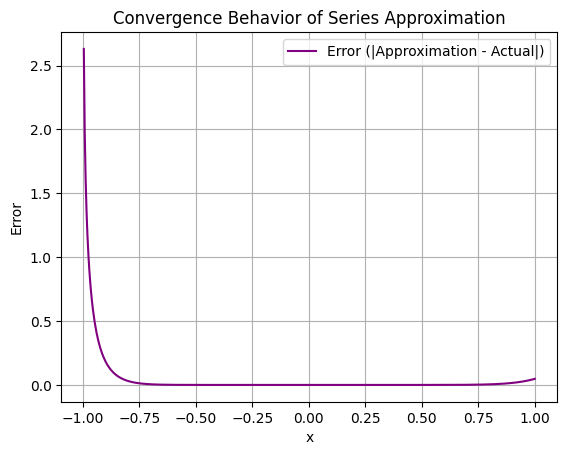

The error is smallest around x = 0, because the series converges well around values near the center of expansion.
As x moves away from 0 the error increases and that is because the series converges slower for large |x| values.
The sharp increase at x = -1 is due to divergence of ln(1 + x), while the small/gentle increase of error near near x = 1 is due to slower convergence.


In [116]:
# (c) Analyze the convergence behavior of the series, particularly focusing on the error for larger values of x.

errors = np.abs(np.array(ln_approximate_values) - ln_actual_values)

# Plot convergence behavior of the series approximation error
plt.plot(x_values, errors, label='Error (|Approximation - Actual|)', color='purple')
plt.title("Convergence Behavior of Series Approximation")
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

Explanation = """The error is smallest around x = 0, because the series converges well around values near the center of expansion.
As x moves away from 0 the error increases and that is because the series converges slower for large |x| values.
The sharp increase at x = -1 is due to divergence of ln(1 + x), while the small/gentle increase of error near near x = 1 is due to slower convergence."""

print(Explanation)

# Question 4: Fourier Transform for Data Filtering

In [136]:
t = sp.Symbol('t')
s = sp.Function('s')
signal_equation = sp.Eq(s(t), sp.sin(2*sp.pi*t) + 0.5*sp.sin(10*sp.pi*t) + 0.3*sp.sin(50*sp.pi*t))

print('A noisy signal s(t) is sampled over the interval t ∈ [0,1] with 500 sample points')
display(signal_equation)

A noisy signal s(t) is sampled over the interval t ∈ [0,1] with 500 sample points


Eq(s(t), sin(2*pi*t) + 0.5*sin(10*pi*t) + 0.3*sin(50*pi*t))

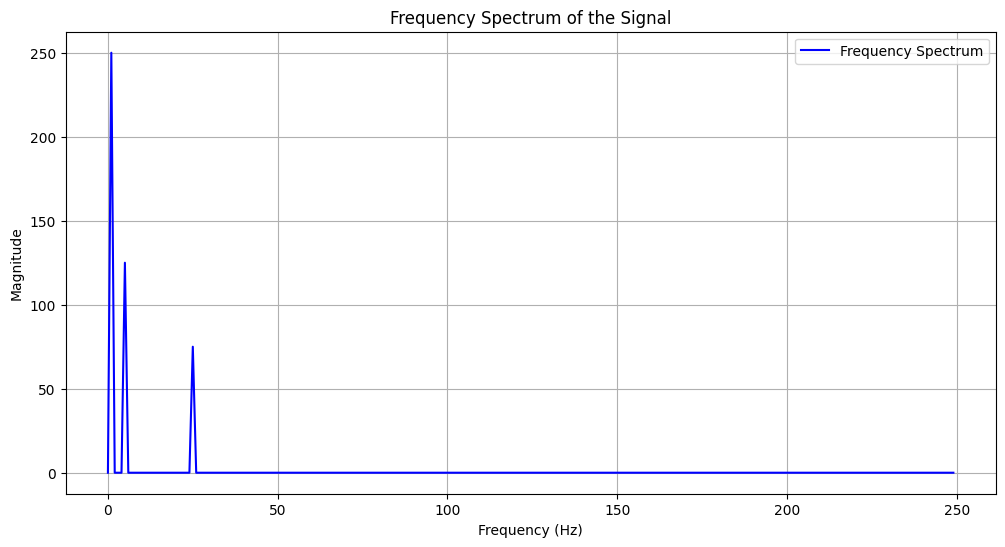

In [137]:
# (a) Perform a Fourier Transform on this signal using NumPy and plot the frequency spectrum.

sampling_rate = 500
t = np.linspace(0, 1, sampling_rate, endpoint=False)
signal = np.sin(2*np.pi*t) + 0.5*np.sin(10*np.pi*t) + 0.3*np.sin(50*np.pi*t)

# Perform Fourier Transform
fft_result = np.fft.fft(signal)  # Fourier Transform
frequencies = np.fft.fftfreq(len(t), d=1/sampling_rate)  # Frequency bins

plt.figure(figsize=(12, 6))
plt.plot(frequencies[:sampling_rate//2], np.abs(fft_result[:sampling_rate//2]), color='blue', label="Frequency Spectrum")
plt.title("Frequency Spectrum of the Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.legend()
plt.show()

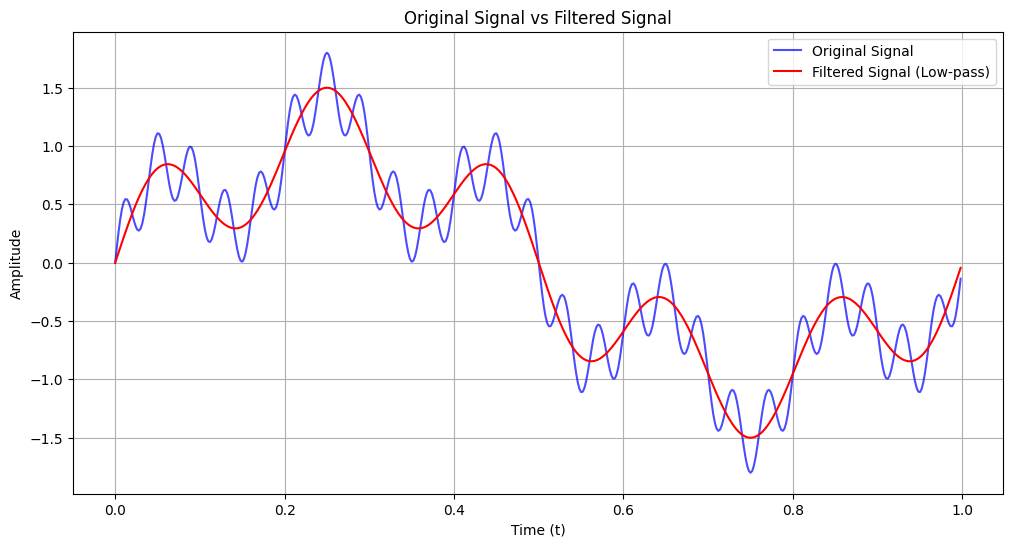

In [138]:
# (b) Design and apply a low-pass filter to remove frequencies above 20 Hz, then plot the filtered signal.

# low-pass filter
low_pass_filter = np.abs(frequencies) <= 20
filtered_fft = fft_result * low_pass_filter

# Transform back to time domain (inverse FFT)
filtered_signal = np.fft.ifft(filtered_fft).real

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Original Signal', color='blue', alpha=0.7)
plt.plot(t, filtered_signal, label='Filtered Signal (Low-pass)', color='red')
plt.title("Original Signal vs Filtered Signal")
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

In [141]:
# (c) Discuss how filtering impacts the signal and its applications in real-world data science scenarios, such as noise reduction in audio processing.

Discuss = """
The Fourier Transform allows us to analyze the frequency components of a signal. By applying a low-pass filter, we removed
frequencies above 20 Hz, effectively reducing the high-frequency noise in the signal. This is a common technique in audio
processing to enhance the quality of signals by retaining only the desired frequency components, such as the fundamental tones.
Real-world applications include:
- Noise reduction in audio processing
- Cleaning data for analysis in sensors and communication systems
- Enhancing clarity in medical imaging by removing artifacts.
"""
print(Discuss)


The Fourier Transform allows us to analyze the frequency components of a signal. By applying a low-pass filter, we removed
frequencies above 20 Hz, effectively reducing the high-frequency noise in the signal. This is a common technique in audio
processing to enhance the quality of signals by retaining only the desired frequency components, such as the fundamental tones.
Real-world applications include:
- Noise reduction in audio processing
- Cleaning data for analysis in sensors and communication systems
- Enhancing clarity in medical imaging by removing artifacts.

